In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('color.jpg')

In [3]:
print("The type of this image is {}".format(type(img)))
print("shape {}".format(img.shape))

The type of this image is <class 'numpy.ndarray'>
shape (866, 1300, 3)


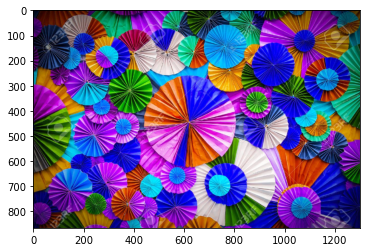

In [4]:
plt.imshow(img)

In [5]:
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

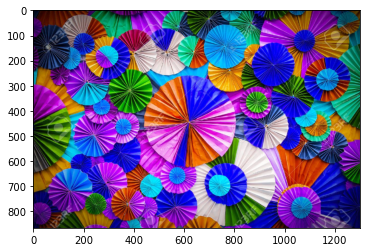

In [6]:
plt.imshow(img)

In [7]:
index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv('colors.csv', names = index, header=None)

In [8]:
clicked = False
r=g=b=xpos=ypos=0

In [9]:
def getColorName(R, G, B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G-int(csv.loc[i,"G"])) + abs(B-int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

In [10]:
def draw_function(event, x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos,clicked
        clicked = True
        xpos =x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)
        
    

In [11]:
cv2.namedWindow('image')

In [12]:
cv2.setMouseCallback('image', draw_function)

In [ ]:
while(1):
    cv2.imshow("image", img)
    if(clicked):
        cv2.rectangle(img,(20,20), (750,60), (b,g,r), -1)
        
        text = getColorName(r,g,b) + 'R='+str(r) + 'G='+str(g) + 'B='+str(b)
        
        cv2.putText(img,text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)
        
        if(r+g+b>=600):
            cv2.putText(img,text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)
            
        clicked=False
        
    if cv2.waitKey(20) & 0xFF ==27:
        break

cv2.destroyAllWindows()
        